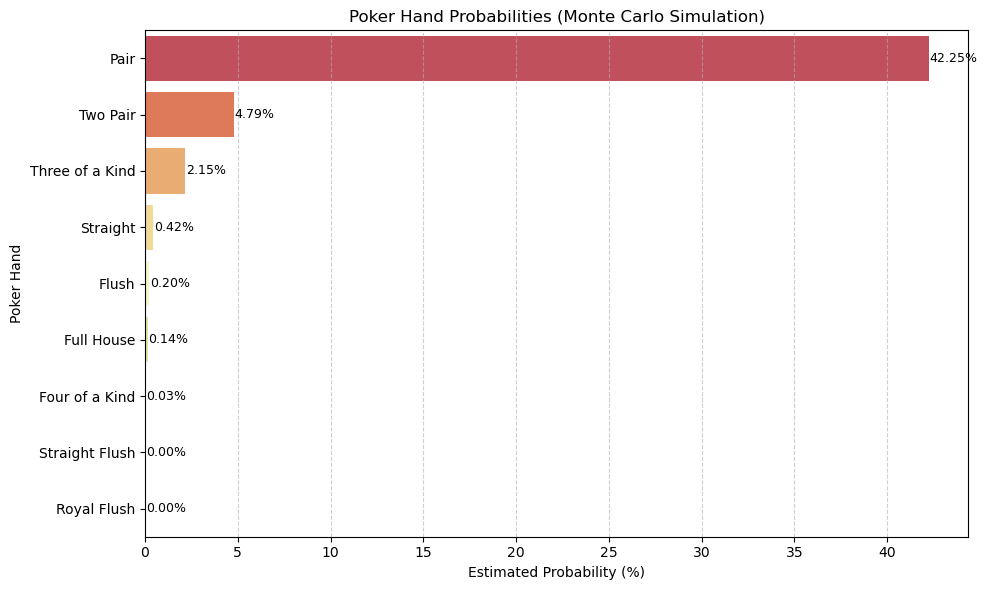

In [22]:
import random
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Deck setup ---
ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
suits = ['♠', '♥', '♦', '♣']
deck = [r + s for r in ranks for s in suits]

# --- Hand check helpers ---
def get_ranks(hand): return [card[:-1] for card in hand]
def get_suits(hand): return [card[-1] for card in hand]

def is_pair(h): return list(Counter(get_ranks(h)).values()).count(2) == 1
def is_two_pair(h): return list(Counter(get_ranks(h)).values()).count(2) == 2
def is_three_of_a_kind(h): return 3 in Counter(get_ranks(h)).values() and not is_full_house(h)
def is_straight(h):
    indices = sorted([ranks.index(r) for r in get_ranks(h)])
    return indices == list(range(indices[0], indices[0]+5)) or indices == [0, 1, 2, 3, 12]
def is_flush(h): return len(set(get_suits(h))) == 1
def is_full_house(h): c = Counter(get_ranks(h)).values(); return 3 in c and 2 in c
def is_four_of_a_kind(h): return 4 in Counter(get_ranks(h)).values()
def is_straight_flush(h): return is_straight(h) and is_flush(h)
def is_royal_flush(h): return is_flush(h) and sorted(get_ranks(h)) == ['10', 'A', 'J', 'K', 'Q']

# --- Simulation ---
hand_checkers = {
    "Pair": is_pair,
    "Two Pair": is_two_pair,
    "Three of a Kind": is_three_of_a_kind,
    "Straight": is_straight,
    "Flush": is_flush,
    "Full House": is_full_house,
    "Four of a Kind": is_four_of_a_kind,
    "Straight Flush": is_straight_flush,
    "Royal Flush": is_royal_flush,
}

results = []
trials = 100000

for hand_name, check_fn in hand_checkers.items():
    count = sum(check_fn(random.sample(deck, 5)) for _ in range(trials))
    prob = (count / trials) * 100
    results.append({"Hand Type": hand_name, "Probability (%)": round(prob, 4)})

# --- Plotting ---
df = pd.DataFrame(results).sort_values("Probability (%)", ascending=False)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x="Probability (%)", 
    y="Hand Type", 
    data=df, 
    hue="Hand Type", 
    palette="Spectral", 
    dodge=False
)

# Add value labels on bars
for i, row in df.iterrows():
    plt.text(
        row["Probability (%)"] + 0.05,  # x position (a bit to the right of bar)
        i,                              # y position (aligned with bar)
        f'{row["Probability (%)"]:.2f}%', 
        va='center', 
        fontsize=9
    )

plt.title("Poker Hand Probabilities (Monte Carlo Simulation)")
plt.xlabel("Estimated Probability (%)")
plt.ylabel("Poker Hand")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


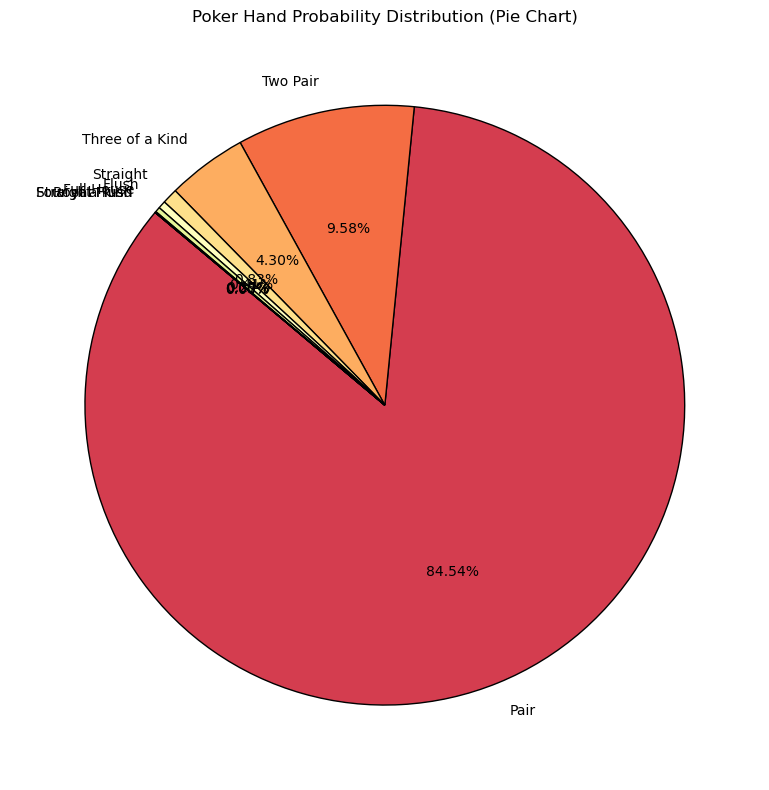

In [34]:
# --- Pie Chart ---
plt.figure(figsize=(8, 8))
colors = sns.color_palette("Spectral", len(df))

plt.pie(
    df["Probability (%)"],
    labels=df["Hand Type"],
    autopct="%1.2f%%",
    startangle=140,
    colors=colors,
    wedgeprops=dict(edgecolor="k", linewidth=1)
)

plt.title("Poker Hand Probability Distribution (Pie Chart)")
plt.tight_layout()
plt.show()
